In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from matplotlib import rcParams

import warnings, time, datetime
warnings.filterwarnings(action='ignore')
rcParams['figure.figsize'] = 12, 8

In [14]:
dic = {
    'Date': ['2020-01-01', '2020-02-01', '2020-03-01'],
    'Open': [1000, 2000, 3000],
    'Close': [1500, 2500, 3500],
    'Volume': [10000, 20000, 30000]
}

pd.DataFrame(dic)

,Date,Open,Close,Volume
0,2020-01-01,1000,1500,10000
1,2020-02-01,2000,2500,20000
2,2020-03-01,3000,3500,30000


## yfinance 패키지를 통해 데이터 불러오기

- 코스피, S&P 500, FTSE, CSI 300 지수

In [2]:
yf_index_dic = {
    'KOSPI': '^KS11',      # 코스피 지수 (한국)
    'S&P500': '^GSPC',     # S&P500 지수 (미국)
    'FTSE': '^FTSE',       # FTSE 지수 (런던)
    'CSI300': '000300.SS'  # CSI 300 지수 (상하이)
}

index_df_dic = {}
for key in tqdm(yf_index_dic):
    index_df_dic[key] = yf.Ticker(yf_index_dic[key]).history('max').dropna()

df = index_df_dic['KOSPI']
print(index_df_dic.keys(), '\n')
print(df.shape)
print(f"{df.index[0]} ~ {df.index[-1]}")
df.head()

100%|█████████████████████████████████████████████| 4/4 [00:01<00:00,  2.01it/s]

dict_keys(['KOSPI', 'S&P500', 'FTSE', 'CSI300']) 

(6469, 7)
1996-12-11 00:00:00 ~ 2023-03-10 00:00:00


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-12-11,705.989990,709.479980,704.429993,704.679993,28000,0,0
1996-12-12,705.109985,706.010010,688.739990,689.380005,25900,0,0
1996-12-13,690.440002,695.719971,677.640015,689.070007,26500,0,0
1996-12-16,686.969971,686.969971,667.710022,673.919983,22800,0,0
1996-12-17,675.349976,680.090027,660.390015,663.349976,31600,0,0


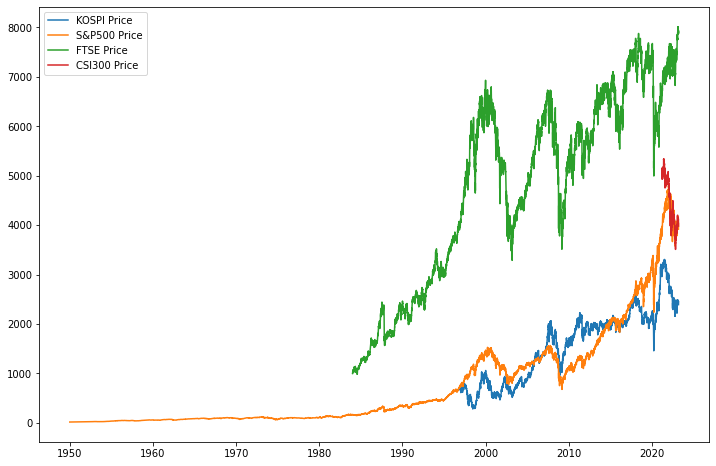

In [6]:
plt.plot(index_df_dic['KOSPI']['Close'], label = 'KOSPI Price')
plt.plot(index_df_dic['S&P500']['Close'], label = 'S&P500 Price')
plt.plot(index_df_dic['FTSE']['Close'], label = 'FTSE Price')
plt.plot(index_df_dic['CSI300']['Close'], label = 'CSI300 Price')
plt.legend(); plt.show()

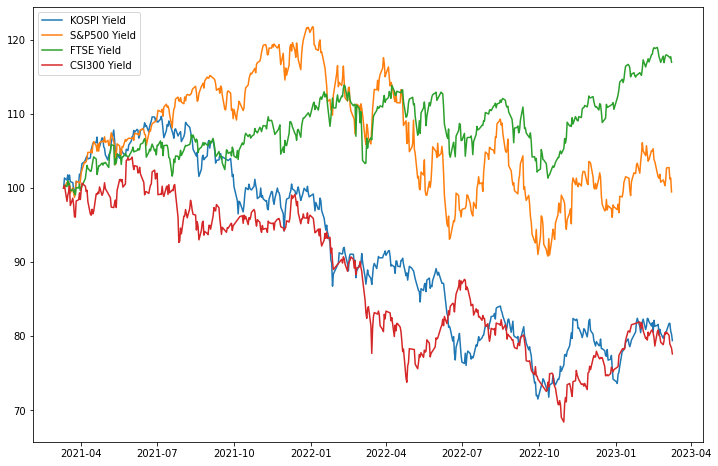

In [7]:
plt.plot((index_df_dic['KOSPI']['Close'].loc['2021-03-11':] / index_df_dic['KOSPI'].loc['2021-03-11']['Close']) * 100, label = 'KOSPI Yield')
plt.plot((index_df_dic['S&P500']['Close'].loc['2021-03-11':] / index_df_dic['S&P500'].loc['2021-03-11']['Close']) * 100, label = 'S&P500 Yield')
plt.plot((index_df_dic['FTSE']['Close'].loc['2021-03-11':] / index_df_dic['FTSE'].loc['2021-03-11']['Close']) * 100, label = 'FTSE Yield')
plt.plot((index_df_dic['CSI300']['Close'].loc['2021-03-11':] / index_df_dic['CSI300'].loc['2021-03-11']['Close']) * 100, label = 'CSI300 Yield')
plt.legend(); plt.show()

## 시계열 데이터를 date 타입으로 변경

In [8]:
df = df.reset_index()
df['Date'] = df['Date'].astype('str').astype('datetime64')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-12-11,705.989990,709.479980,704.429993,704.679993,28000,0,0
1996-12-12,705.109985,706.010010,688.739990,689.380005,25900,0,0
1996-12-13,690.440002,695.719971,677.640015,689.070007,26500,0,0
1996-12-16,686.969971,686.969971,667.710022,673.919983,22800,0,0
1996-12-17,675.349976,680.090027,660.390015,663.349976,31600,0,0


## 날짜 데이터 다루기

- `pd.to_datetime()`
- groupby, agg + `pd.Grouper(key='', freq='m')`
- `pd.shift()`

In [13]:
pd.date_range('2020-01-01', '2021-12-31', freq='MS')

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [9]:
from dateutil.relativedelta import relativedelta

print(pd.to_datetime(df.index[0]), '\n')
print(pd.to_datetime(df.index[0]) - relativedelta(days=10))
print(pd.to_datetime(df.index[0]) - relativedelta(months=5))
print(pd.to_datetime(df.index[0]) - relativedelta(years=1), '\n')

print(pd.to_datetime(df.index[0]).year)
print(pd.to_datetime(df.index[0]).month)
print(pd.to_datetime(df.index[0]).day)

1996-12-11 00:00:00 

1996-12-01 00:00:00
1996-07-11 00:00:00
1995-12-11 00:00:00 

1996
12
11


In [155]:
a = df.reset_index()
a.groupby(pd.Grouper(key='Date', freq='m')).agg(max).head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-12-31,705.989990,709.479980,704.429993,704.679993,35100,0,0
1997-01-31,721.039978,721.789978,697.559998,718.460022,48200,0,0
1997-02-28,720.419983,726.130005,715.000000,721.000000,49800,0,0
1997-03-31,680.479980,685.950012,679.830017,681.219971,45600,0,0
1997-04-30,706.049988,710.669983,703.130005,704.200012,46700,0,0


In [162]:
df.resample('M').first().head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-12-31,705.989990,709.479980,704.429993,704.679993,28000,0,0
1997-01-31,647.669983,655.700012,635.409973,653.789978,13900,0,0
1997-02-28,682.260010,696.210022,681.010010,687.250000,27300,0,0
1997-03-31,677.179993,684.440002,677.179993,679.640015,27000,0,0
1997-04-30,678.969971,688.119995,672.070007,672.989990,38600,0,0


In [163]:
df.resample('MS').first().head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-12-01,705.989990,709.479980,704.429993,704.679993,28000,0,0
1997-01-01,647.669983,655.700012,635.409973,653.789978,13900,0,0
1997-02-01,682.260010,696.210022,681.010010,687.250000,27300,0,0
1997-03-01,677.179993,684.440002,677.179993,679.640015,27000,0,0
1997-04-01,678.969971,688.119995,672.070007,672.989990,38600,0,0


In [154]:
a = df[['Volume']].reset_index()
a['전일거래량'] = a['Volume'].shift(1)
a.head()

,Date,Volume,전일거래량
0,1996-12-11,28000,NaN
1,1996-12-12,25900,28000.0
2,1996-12-13,26500,25900.0
3,1996-12-16,22800,26500.0
4,1996-12-17,31600,22800.0


In [166]:
print(df['Open'].nlargest(n=5), '\n')
print(df['Open'].nsmallest(n=5))

Date
2021-06-28    3305.459961
2021-06-29    3305.260010
2021-07-07    3303.590088
2021-07-01    3297.919922
2021-07-06    3295.439941
Name: Open, dtype: float64 

Date
1998-06-16    283.410004
1998-06-17    287.980011
1998-09-23    291.809998
1998-09-24    293.480011
1998-08-19    294.130005
Name: Open, dtype: float64


## 데이터프레임에서 값들의 사칙 연산

- 시가 대비 종가, 고가 대비 종가, 저가 대비 종가 계산
- 시계열 데이터의 종가 평균, 표준편차

In [70]:
pd.DataFrame(df['Open'] / df['Close']).head()
pd.DataFrame(df['High'] / df['Close']).head()
pd.DataFrame(df['Low'] / df['Close']).head()

,0
Date,
1996-12-11,0.999645
1996-12-12,0.999072
1996-12-13,0.983412
1996-12-16,0.990785
1996-12-17,0.995538


In [101]:
df['Close'].mean()

1571.8749261481216

In [93]:
df['Close'].std()

719.1653884396588

## 데이터를 통합시키기, 녹이기 (merge, melt)

In [71]:
df1 = index_df_dic['KOSPI'].reset_index()
df2 = index_df_dic['S&P500'].reset_index()

merge_df = pd.merge(df1[['Date', 'Open']], df2[['Date', 'Open']], on='Date', how='inner')
merge_df.columns = ['Date', 'KOSPI_Open', 'S&P500_Open']
merge_df.head()

,Date,KOSPI_Open,S&P500_Open
0,1996-12-11,705.989990,747.539978
1,1996-12-12,705.109985,740.729980
2,1996-12-13,690.440002,729.330017
3,1996-12-16,686.969971,728.640015
4,1996-12-17,675.349976,720.979980


In [126]:
df.melt()

,variable,value
0,Open,705.989990
1,Open,705.109985
2,Open,690.440002
3,Open,686.969971
4,Open,675.349976
...,...,...
45264,Stock Splits,0.000000
45265,Stock Splits,0.000000
45266,Stock Splits,0.000000
45267,Stock Splits,0.000000


## 차이 (백분율, 수익률) 계산

- `df.pct_change(periods=1, fill_method='pad', limit=None, freq=None, kwargs)` 활용
   - fill_method='ffill' 은 NA 값을 위에 있는 값으로 대체
   - fill_method='bfill' 은 NA 값을 아래에 있는 값으로 대체
- 현재 및 이전 요소 사이의 백분율 값 계산
- (내일 값 - 오늘 값) / 오늘 값

In [73]:
# pct_change(periods=1)은 '일 평균 수익률' 계산식과 동일
df.pct_change().head() # (705.109985 - 705.989990) / 705.989990 = -0.001246

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-12,-0.001246,-0.004891,-0.022273,-0.021712,-0.075000,NaN,NaN
1996-12-13,-0.020805,-0.014575,-0.016116,-0.000450,0.023166,NaN,NaN
1996-12-16,-0.005026,-0.012577,-0.014654,-0.021986,-0.139623,NaN,NaN
1996-12-17,-0.016915,-0.010015,-0.010963,-0.015684,0.385965,NaN,NaN


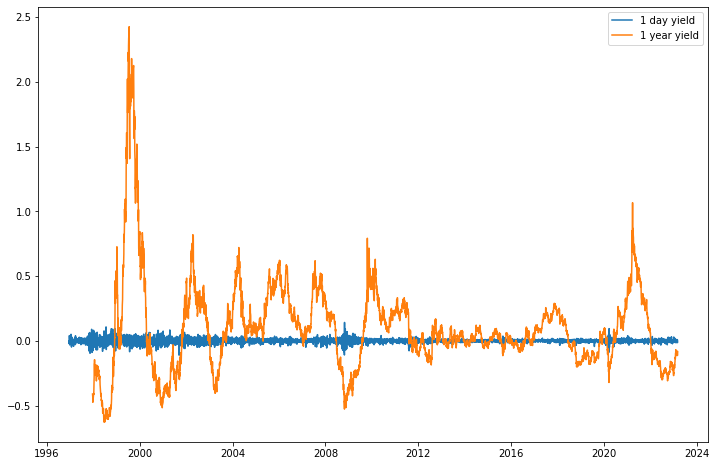

In [113]:
# 일 평균, 연 평균 수익률
plt.plot(df.pct_change()['Open'], label='1 day yield')
plt.plot(df.pct_change(periods=250)['Open'], label='1 year yield')
plt.legend() ; plt.show()

In [22]:
df.pct_change(3).head() # (686.969971 - 705.989990) / 705.989990 = 0.026941

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-16,-0.026941,-0.031727,-0.052127,-0.043651,-0.185714,NaN,NaN
1996-12-17,-0.042206,-0.036713,-0.041162,-0.037759,0.220077,NaN,NaN


## 이동평균선 계산

In [83]:
df['Open'].rolling(window=2).sum() # 1, 2행 sum & 2, 3행 sum, 3, 4행 sum ...

Date
1996-12-11            NaN
1996-12-12    1411.099976
1996-12-13    1395.549988
1996-12-16    1377.409973
1996-12-17    1362.319946
                 ...     
2023-03-02    4832.190186
2023-03-03    4853.340088
2023-03-06    4891.189941
2023-03-07    4909.500000
2023-03-08    4892.620117
Name: Open, Length: 6467, dtype: float64

In [84]:
df['Open'].rolling(window=2).mean() # 1, 2행 mean & 2, 3행 mean, 3, 4행 mean ...

Date
1996-12-11            NaN
1996-12-12     705.549988
1996-12-13     697.774994
1996-12-16     688.704987
1996-12-17     681.159973
                 ...     
2023-03-02    2416.095093
2023-03-03    2426.670044
2023-03-06    2445.594971
2023-03-07    2454.750000
2023-03-08    2446.310059
Name: Open, Length: 6467, dtype: float64

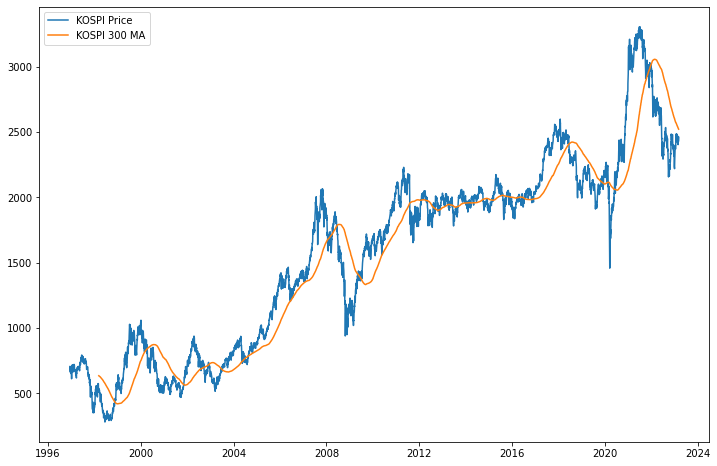

In [91]:
plt.plot(df['Close'], label = 'KOSPI Price')
plt.plot(df['Close'].rolling(window=300).mean(), label = 'KOSPI 300 MA')
plt.legend() ; plt.show()

## 누적합

In [171]:
a = df[['Volume']]
a['Volume_cumsum'] = a.cumsum(axis=0)
a.head()

,Volume,Volume_cumsum
Date,,
1996-12-11,28000,28000
1996-12-12,25900,53900
1996-12-13,26500,80400
1996-12-16,22800,103200
1996-12-17,31600,134800


In [175]:
b = df[['Close']]
b['전고점'] = b['Close'].cummax()
b['DD'] = (1 - b['Close'] / b['전고점']) * 100
print(f"MDD: {b['DD'].max()}")
b

MDD: 64.65940403573595


,Close,전고점,DD
Date,,,
1996-12-11,704.679993,704.679993,0.000000
1996-12-12,689.380005,704.679993,2.171197
1996-12-13,689.070007,704.679993,2.215188
1996-12-16,673.919983,704.679993,4.365103
1996-12-17,663.349976,704.679993,5.865076
...,...,...,...
2023-03-02,2427.850098,3305.209961,26.544754
2023-03-03,2432.070068,3305.209961,26.417078
2023-03-06,2462.620117,3305.209961,25.492778


## 결측값 없는 첫 번째 또는 마지막 번째 값 찾기

In [102]:
col  = ['col1', 'col2']
row  = ['row1', 'row2', 'row3', 'row4', 'row5']
data = [[np.nan, np.nan], [pd.NA, 4], [pd.NA, pd.NaT], [5, 6], [np.nan, pd.NA]]
test_df = pd.DataFrame(data, row, col)
test_df

,col1,col2
row1,NaN,NaN
row2,<NA>,4
row3,<NA>,NaT
row4,5,6
row5,NaN,<NA>


In [107]:
print(test_df['col1'].first_valid_index()) # 앞에서부터 NaN이 아닌 처음으로 나온 <NA>의 index = row4
print(test_df['col2'].first_valid_index()) # 앞에서부터 NaN이 아닌 처음으로 나온 4의 index = row2

row4
row2


In [108]:
print(test_df['col1'].last_valid_index()) # 뒤에서부터 NaN이 아닌 처음으로 나온 5의 index = row4
print(test_df['col2'].last_valid_index()) # 뒤에서부터 NaN이 아닌 처음으로 나온 6의 index = row4

row4
row4


In [127]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-12-11,705.989990,709.479980,704.429993,704.679993,28000,0,0
1996-12-12,705.109985,706.010010,688.739990,689.380005,25900,0,0
1996-12-13,690.440002,695.719971,677.640015,689.070007,26500,0,0
1996-12-16,686.969971,686.969971,667.710022,673.919983,22800,0,0
1996-12-17,675.349976,680.090027,660.390015,663.349976,31600,0,0
...,...,...,...,...,...,...,...
2023-03-02,2414.610107,2440.590088,2411.850098,2427.850098,427900,0,0
2023-03-03,2438.729980,2442.100098,2423.080078,2432.070068,371500,0,0
2023-03-06,2452.459961,2464.449951,2441.070068,2462.620117,417900,0,0
